In [ ]:
# exo 1 : 

In [214]:
from os import path
import pandas as pd
import urllib
import zipfile
import sys
url = u'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
location = url + zipfilename
if not path.isfile(zipfilename):
    urllib.request.urlretrieve(location, zipfilename)
zipfile.ZipFile(zipfilename).extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
                 na_values=na_values, usecols=fields)

# Question 1 : 

In [98]:
# count missing values
df.isnull().sum()

Date                      0
Time                      0
Global_active_power    3732
dtype: int64

In [99]:
# delete rows with missing values
df = df.dropna()

In [100]:
# sanity check
df.isnull().sum()

Date                   0
Time                   0
Global_active_power    0
dtype: int64

# Question 2 :

In [101]:
df['DateTime'] = df['Date'] +' '+ df['Time']

In [102]:
# datetime to timetime 
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [103]:
# set index to DateTime
df = df.set_index('DateTime')

In [104]:
df.drop(['Date', 'Time'], axis=1, inplace=True)


In [105]:
df

,Global_active_power
DateTime,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666
...,...
2007-04-05 14:39:00,0.348
2007-04-05 14:40:00,0.344
2007-04-05 14:41:00,0.342


# question 3 : 

<AxesSubplot:xlabel='DateTime'>

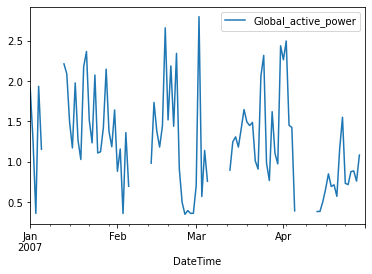

In [106]:
# average power consumption per day 
df_daily = df.resample('D').mean()
df_daily
# plot global_active_power between january 1 w007 and april 30 2007 
df_daily.loc['2007-01-01':'2007-04-30'].plot(y='Global_active_power')



In [137]:
import requests
# load https://perso.telecom-paristech.fr/sabourin/mdi720/TG_STAID011249.txt
url = 'https://perso.telecom-paristech.fr/sabourin/mdi720/TG_STAID011249.txt'
response = requests.get(url)
temp_txt = response.text


temp_txt = temp_txt.split('#See files sources.txt and stations.txt for more info.')[-1].split('#')[-1]
temp_txt = temp_txt.split('\n')
temp_txt = [line.replace('\r','').strip() for line in temp_txt][1:-1]
temp_header = [col.strip() for col in temp_txt[0].split(',')]
def clean_line(line):
    line = line.split(',')
    line = [col.strip() for col in line]
    # to numeric 
    line = [float(col) for col in line]
    # date
    line[2] = str(int(line[2]))
    return line
temp_list = [clean_line(row) for row in temp_txt[1:]]

df_temp = pd.DataFrame(temp_list, columns=temp_header)
df_temp = df_temp[['DATE', 'TG']]
df_temp.head()

,DATE,TG
0,19210301,50.0
1,19210302,46.0
2,19210303,46.0
3,19210304,31.0
4,19210305,95.0


In [138]:
df_temp['TG'] = df_temp['TG']/10

In [139]:
# check missing values
df_temp.isnull().sum()

DATE    0
TG      0
dtype: int64

In [140]:
# timestamp to datetime
df_temp['DATE'] = pd.to_datetime(df_temp['DATE'])

In [141]:
# select elements between january 1 w007 and april 30 2007
df_temp = df_temp.set_index('DATE')


In [142]:
df_temp

,TG
DATE,
1921-03-01,5.0
1921-03-02,4.6
1921-03-03,4.6
1921-03-04,3.1
1921-03-05,9.5
...,...
2016-08-27,26.6
2016-08-28,25.5
2016-08-29,20.6


In [143]:
# merge with df_daily
df_daily = df_daily.join(df_temp, how='inner')
df_daily.head()

,Global_active_power,TG
2006-12-16,3.053475,6.0
2006-12-17,2.354486,2.8
2006-12-18,1.530435,3.5
2006-12-19,1.157079,2.4
2006-12-20,1.545658,3.0


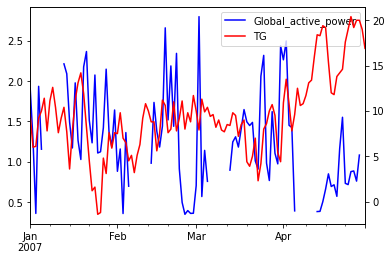

In [156]:
import matplotlib.pyplot as plt

# plot temperature and Global_active_power  between january 1 2007 and april 30 2007 
df_filter = df_daily.loc['2007-01-01':'2007-04-30']

fig, ax = plt.subplots()

df_filter['Global_active_power'].plot(ax=ax, style='b-',label='Global_active_power')
df_filter['TG'].plot(ax=ax, style='r-', secondary_y=True, label ='temperature')

ax.legend([ax.get_lines()[0], ax.right_ax.get_lines()[0]], ['Global_active_power','TG'], loc=0)



In [165]:
# exo 5  :
# load https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original dataframe 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
header = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df_auto = pd.read_csv(url, sep='\s+', na_values='?', header=None, names=header)
df_auto


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [166]:
# check missing values
df_auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [185]:
df_auto.dropna(inplace=True)

In [190]:
# question 17 : 
# add three binary columns : is_US, is_Europe, is_Japan
df_auto['is_US'] = df_auto['origin'] == 1
df_auto['is_Europe'] = df_auto['origin'] == 2
df_auto['is_Japan'] = df_auto['origin'] == 3
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,is_US,is_Europe,is_Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,True,False,False


In [192]:
# question 18 : 
frame_1 = df_auto[df_auto['is_US'] ==True].sample(3)  
frame_2 = df_auto[df_auto['is_Japan'] ==True].sample(3) 
frame_3 =  df_auto[df_auto['is_Europe'] ==True].sample(3)
frames = [frame_1, frame_2, frame_3]

result = pd.concat(frames)
result


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,is_US,is_Europe,is_Japan
316,19.1,6,225.0,90.0,3381.0,18.7,80,1,dodge aspen,True,False,False
153,18.0,6,250.0,105.0,3459.0,16.0,75,1,chevrolet nova,True,False,False
215,13.0,8,318.0,150.0,3755.0,14.0,76,1,dodge d100,True,False,False
267,27.5,4,134.0,95.0,2560.0,14.2,78,3,toyota corona,False,False,True
31,25.0,4,113.0,95.0,2228.0,14.0,71,3,toyota corona,False,False,True
167,29.0,4,97.0,75.0,2171.0,16.0,75,3,toyota corolla,False,False,True
360,30.7,6,145.0,76.0,3160.0,19.6,81,2,volvo diesel,False,True,False
304,37.3,4,91.0,69.0,2130.0,14.7,79,2,fiat strada custom,False,True,False
359,28.1,4,141.0,80.0,3230.0,20.4,81,2,peugeot 505s turbo diesel,False,True,False


In [245]:
# get least square estimator 
from sklearn.linear_model import LinearRegression

X_train,y_train = result.loc[:,[ 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'is_US','is_Europe','is_Japan']], result['mpg']

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coefs = regressor.coef_ + regressor.intercept_
coefs = list(regressor.coef_)  + [regressor.intercept_]


In [246]:
X_test ,y_test = df_auto.loc[:, [ 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'is_US','is_Europe','is_Japan']],df_auto['mpg']
y_pred = regressor.predict(X_test)

In [247]:
# get the rmse 
import numpy as np 
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('rmse : ', rmse)
print('relative rmse to mean : ', round(rmse/np.mean(y_test),2), '%')
# quite a high error given the mean of our date we cant acceot a 30 % devieation 

rmse :  7.219944583942002
relative rmse to mean :  0.31 %


In [250]:
dict(zip( [ 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'is_US','is_Europe','is_Japan','INTERCEPT'],coefs))

# american cars are more efficient than european  and japaneese cars...  :)
# weight with the least effect on consumption is not realistic ! 

{'cylinders': -0.2138481218196411,
 'displacement': 0.14140373281507093,
 'horsepower': -0.3078208043626305,
 'weight': -0.007955720883867354,
 'acceleration': -0.8423720413222304,
 'model year': 0.3343279075131386,
 'is_US': -9.997960742079181,
 'is_Europe': 7.270439236391878,
 'is_Japan': 2.7275215056873034,
 'INTERCEPT': 42.17349886227295}

In [257]:
# question 19 : 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
one_hot_encoding_columns = ['origin']
scaling_columns = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
preprocessor = ColumnTransformer([

    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'),
     one_hot_encoding_columns),
    ('standard-scaler', StandardScaler(), scaling_columns)
])
model = make_pipeline(
    preprocessor,
    LinearRegression()
)

In [258]:
x_columns = scaling_columns+one_hot_encoding_columns
data_train = df_auto.loc[:,x_columns]
target_train = df_auto['mpg']
model.fit(data_train, target_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['origin']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['cylinders', 'displacement',
                                                   'horsepower', 'weight',
                                                   'acceleration',
                                                   'model year'])])),
                ('linearregression', LinearRegression())])

In [261]:
# get rmse 
target_pred = model.predict(data_train)
rmse_full = np.sqrt(mean_squared_error(target_train, target_pred))
print('rmse : ', rmse_full)
print('relative rmse to mean : ', round(rmse_full/np.mean(target_train),2), '%')

rmse :  3.2683515153304166
relative rmse to mean :  0.14 %


In [296]:
# get lin_reg coeifs 
coefs_full = list(model.named_steps['linearregression'].coef_) +[ model.named_steps['linearregression'].intercept_]
origine_new_feat_names  = list(model.named_steps['columntransformer'] .named_transformers_['one-hot-encoder'].get_feature_names_out())
feature_names =   origine_new_feat_names+ scaling_columns+['INTERCEPT']
dict(zip(feature_names,coefs_full))

{'origin_1': -1.827743529498282,
 'origin_2': 0.8022588305190879,
 'origin_3': 1.0254846989791904,
 'cylinders': -0.8342719689637448,
 'displacement': 2.5060187382190424,
 'horsepower': -0.6990093194431044,
 'weight': -5.69254263882314,
 'acceleration': 0.217955989650767,
 'model year': 2.8587092268938052,
 'INTERCEPT': 24.242424165899045}

In [238]:
#  given the coefs we can say that the weight is the most important feature wich is realisatic since more weight => more consuption 
# we can see also that there is positive dependency between the year and the consumption whch may cause some problems if we traied the model on futuristic years like 2020 or smtg 

In [304]:

observation = [6 ,225 ,100 ,3233 ,15.4, 2017-1900, 1]
observation = np.array(observation).reshape(1,-1)
observation_df = pd.DataFrame(observation, columns=x_columns)
prediction = model.predict(observation_df)[0]
print('prediction : ', prediction)

prediction :  53.11965663639704


In [305]:
prediction , np.mean(target_train)

(53.11965663639704, 23.445918367346938)

In [303]:
# the high consumption comes from the year which out of sample and already have a high positive coef chi drive the prediction up 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,is_US,is_Europe,is_Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,True,False,False
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup,False,True,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,True,False,False
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,True,False,False
